In [2]:
# !pip install fastdtw
# ^ Uncomment above if using in Google Colab Environment

/home/sags/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


The Procrustes disparity between the lines is: 8.16594296420188e-32
The DTW distance between the lines is: 10.625316113301073


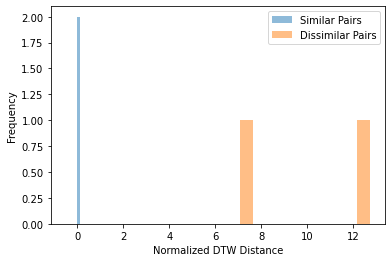

In [1]:
import matplotlib.pyplot as plt
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
from scipy.spatial import procrustes
import numpy as np
def compare_lines_procrustes(line1, line2):
    # Convert lines to numpy arrays
    line1 = np.array(line1)
    line2 = np.array(line2)

    # Pad the shorter line with repeated last points to make them equal in length
    if len(line1) < len(line2):
        line1 = np.vstack(
            [line1, np.tile(line1[-1], (len(line2) - len(line1), 1))])
    elif len(line2) < len(line1):
        line2 = np.vstack(
            [line2, np.tile(line2[-1], (len(line1) - len(line2), 1))])

    # Perform Procrustes analysis
    mtx1, mtx2, disparity = procrustes(line1, line2)

    return disparity


# Example usage
line1 = [(0, 0), (1, 2), (3, 3)]
line2 = [(2, 3), (3, 5), (5, 6)]  # Translated version of line1

disparity = compare_lines_procrustes(line1, line2)
print(f"The Procrustes disparity between the lines is: {disparity}")

#######


def compare_lines_dtw(line1, line2):
    # Compute the DTW distance
    distance, _ = fastdtw(line1, line2, dist=euclidean)
    return distance


# Example usage
line1 = [(0, 0), (1, 2), (3, 3)]
line2 = [(2, 3), (3, 5), (5, 6)]  # Translated version of line1

distance = compare_lines_dtw(line1, line2)
print(f"The DTW distance between the lines is: {distance}")
# Sample data for similar and dissimilar pairs
similar_pairs = [
    ([(0, 0), (1, 1), (2, 2)], [(0, 0), (1, 1), (2, 2)]),
    ([(0, 0), (1, 2), (2, 4)], [(0, 0), (1, 2), (2, 4)]),
    # Add more similar pairs
]

dissimilar_pairs = [
    ([(0, 0), (1, 1), (2, 2)], [(3, 3), (4, 4), (5, 5)]),
    ([(0, 0), (1, 2), (2, 4)], [(2, 2), (3, 3), (4, 4)]),
    # Add more dissimilar pairs
]

similar_distances = [compare_lines_dtw(pair[0], pair[1]) for pair in similar_pairs]
dissimilar_distances = [compare_lines_dtw(pair[0], pair[1]) for pair in dissimilar_pairs]

# Plotting histograms
plt.hist(similar_distances, bins=10, alpha=0.5, label='Similar Pairs')
plt.hist(dissimilar_distances, bins=10, alpha=0.5, label='Dissimilar Pairs')
plt.xlabel('Normalized DTW Distance')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Mean: 784.2768865931977
Mean: 1607.541237101971
Mean: 2442.8832282492913
Mean: 3254.1022005529585
Mean: 4075.5925507371385


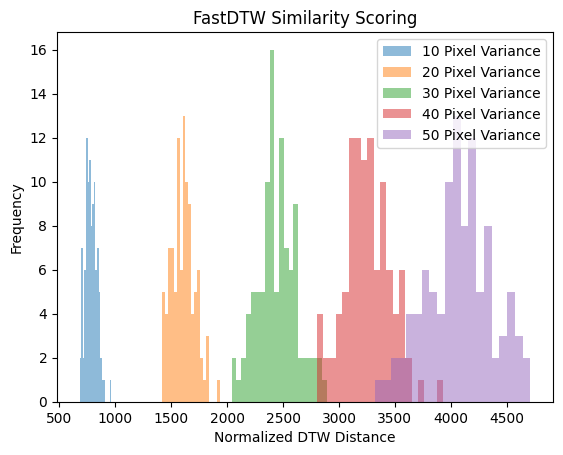

In [ ]:
left= [(161, 778), (162, 778), (162, 778), (162, 778), (162, 778), (160, 780), (159, 780), (158, 781), (162, 785), (167, 786), (172, 792), (174, 794), (175, 803), (179, 810), (186, 813), (192, 816), (197, 818), (207, 826), (235, 820), (248, 809), (253, 805), (263, 778), (262, 754), (264, 752), (261, 690), (252, 663), (242, 662), (232, 649), (224, 634), (226, 615), (219, 600), (214, 585), (218, 557), (228, 533), (232, 531), (244, 498), (255, 482), (253, 478), (254, 475), (252, 483), (250, 483), (249, 483), (248, 486), (244, 485), (238, 483), (235, 483), (233, 481), (230, 479), (230, 480), (229, 481), (227, 482), (226, 483), (225, 484), (225, 485), (225, 490), (224, 496), (225, 501), (225, 502), (225, 502), (226, 503), (227, 502), (228, 502), (229, 502), (229, 502), (230, 502), (230, 502), (230, 503), (230, 504)]
right= [(173, 771), (173, 772), (174, 773), (174, 774), (175, 775), (175, 776), (175, 777), (176, 778), (176, 781), (176, 786), (177, 793), (178, 795), (179, 801), (180, 808), (182, 816), (187, 819), (193, 821), (202, 823), (219, 818), (236, 812), (239, 810), (248, 780), (261, 753), (263, 751), (256, 698), (250, 676), (247, 672), (245, 649), (241, 629), (239, 616), (238, 596), (238, 577), (238, 555), (241, 544), (241, 534), (243, 500), (254, 484), (253, 473), (257, 467), (255, 476), (248, 477), (244, 477), (239, 478), (235, 477), (230, 476), (228, 476), (226, 474), (222, 470), (221, 468), (221, 468), (218, 470), (217, 472), (216, 473), (216, 474), (215, 475), (214, 475), (214, 477), (213, 478), (213, 479), (214, 481), (214, 483), (214, 483), (214, 484), (214, 484), (214, 484), (214, 485), (214, 485)]

# # np.random.normal(loc=0.0, scale=20, size=2)
# first = (141, 211)
# second = (2, 4)
# # x = zip(first, second)
# print(tuple(sum(aa, bb) for aa, bb in zip(first, second)))

def create_dataset(iterations, pixel_variance):
  gaussian_pairs = []
  for i in range(iterations):
    current_pair = []
    for j in range(len(right)):
      rv = np.random.normal(loc=0.0, scale=pixel_variance, size=2)
      new_x = right[j][0] + int(rv[0])
      new_y = right[j][1] + int(rv[1])
      current_pair.append((new_x, new_y))
    gaussian_pairs.append(current_pair)
  return gaussian_pairs

distances_10 = [compare_lines_dtw(right, pair) for pair in create_dataset(100, 10)]
distances_20 = [compare_lines_dtw(right, pair) for pair in create_dataset(100, 20)]
distances_30 = [compare_lines_dtw(right, pair) for pair in create_dataset(100, 30)]
distances_40 = [compare_lines_dtw(right, pair) for pair in create_dataset(100, 40)]
distances_50 = [compare_lines_dtw(right, pair) for pair in create_dataset(100, 50)]

print(f"Mean: {np.mean(distances_10)}")
print(f"Mean: {np.mean(distances_20)}")
print(f"Mean: {np.mean(distances_30)}")
print(f"Mean: {np.mean(distances_40)}")
print(f"Mean: {np.mean(distances_50)}")

plt.hist(distances_10, bins=20, alpha=0.5, label='10 Pixel Variance')
plt.hist(distances_20, bins=20, alpha=0.5, label='20 Pixel Variance')
plt.hist(distances_30, bins=20, alpha=0.5, label='30 Pixel Variance')
plt.hist(distances_40, bins=20, alpha=0.5, label='40 Pixel Variance')
plt.hist(distances_50, bins=20, alpha=0.5, label='50 Pixel Variance')

# plt.hist(dissimilar_distances, bins=10, alpha=0.5, label='Dissimilar Pairs')
plt.xlabel('Normalized DTW Distance')
plt.ylabel('Frequency')
plt.title('FastDTW Similarity Scoring')
plt.legend()
plt.show()

Mean: 0.008131969299855239
Mean: 0.0331600876565692
Mean: 0.07363681580188251
Mean: 0.12214224465646804
Mean: 0.17985161802772473


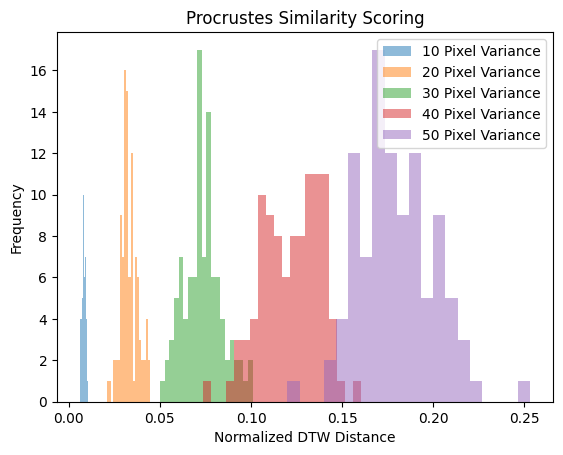

In [ ]:

distances_10_p = [compare_lines_procrustes(right, pair) for pair in create_dataset(100, 10)]
distances_20_p = [compare_lines_procrustes(right, pair) for pair in create_dataset(100, 20)]
distances_30_p = [compare_lines_procrustes(right, pair) for pair in create_dataset(100, 30)]
distances_40_p = [compare_lines_procrustes(right, pair) for pair in create_dataset(100, 40)]
distances_50_p = [compare_lines_procrustes(right, pair) for pair in create_dataset(100, 50)]

print(f"Mean: {np.mean(distances_10_p)}")
print(f"Mean: {np.mean(distances_20_p)}")
print(f"Mean: {np.mean(distances_30_p)}")
print(f"Mean: {np.mean(distances_40_p)}")
print(f"Mean: {np.mean(distances_50_p)}")


plt.hist(distances_10_p, bins=20, alpha=0.5, label='10 Pixel Variance')
plt.hist(distances_20_p, bins=20, alpha=0.5, label='20 Pixel Variance')
plt.hist(distances_30_p, bins=20, alpha=0.5, label='30 Pixel Variance')
plt.hist(distances_40_p, bins=20, alpha=0.5, label='40 Pixel Variance')
plt.hist(distances_50_p, bins=20, alpha=0.5, label='50 Pixel Variance')
# plt.hist(dissimilar_distances, bins=10, alpha=0.5, label='Dissimilar Pairs')
plt.xlabel('Normalized DTW Distance')
plt.ylabel('Frequency')
plt.title('Procrustes Similarity Scoring')
plt.legend()
plt.show()

[0.0, 0.09017743232015003, 0.1820991149252769, 0.2713610432650245, 0.3494885472464985, 0.42408916282749404]
(80.18439153033009, 79.30691875849126)
(69.88741783359887, 69.16351781079267)
(59.88780030135028, 60.28539235835244)


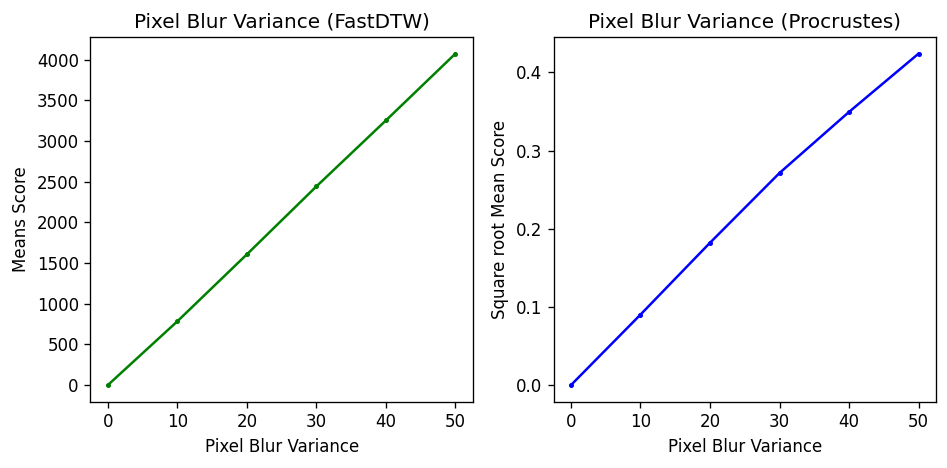

In [ ]:
import math
fdtw_means = [0, np.mean(distances_10), np.mean(distances_20), np.mean(distances_30), np.mean(distances_40), np.mean(distances_50)]
proc_means = [0, np.mean(distances_10_p), np.mean(distances_20_p), np.mean(distances_30_p), np.mean(distances_40_p), np.mean(distances_50_p)]
proc_sqrt = []
for r in range(len(proc_means)):
  proc_sqrt.append(np.sqrt(proc_means[r]))
blur = [0, 10, 20, 30, 40, 50]

print(proc_sqrt)

def give_score(fdtw, proc):
    slope_fdtw = 81.125
    slope_proc = 0.0088

    score_fdtw = 100.0 - fdtw/slope_fdtw
    score_proc = 100.0 - math.sqrt(proc)/slope_proc

    return score_fdtw, score_proc

print(give_score(fdtw_means[2], proc_means[2]))
print(give_score(fdtw_means[3], proc_means[3]))
print(give_score(fdtw_means[4], proc_means[4]))

fig, axs = plt.subplots(1, 2, figsize=(8, 4), dpi=120, tight_layout=True)
# plt.xlabel('Pixel Blur Variance')
# plt.ylabel('Means Score')
# plt.title('Average Score vs. Pixel Blur Variance')
# plt.scatter(blur, fdtw_means)
# plt.scatter(blur, proc_means)
# plt.legend()
# plt.show()

# Plot samples for uniform distribution
axs[0].set_title("Pixel Blur Variance (FastDTW)")
axs[0].set_xlabel('Pixel Blur Variance')
axs[0].set_ylabel('Means Score')
axs[0].plot(blur, fdtw_means, linestyle='-', marker='o', markersize=2, color='green')
# axs[0].set_xlim(0.0, 1.0)
# axs[0].set_ylim(0.0, 1.0)

# Plot samples for normal distribution
axs[1].set_title("Pixel Blur Variance (Procrustes)")
axs[1].set_xlabel('Pixel Blur Variance')
axs[1].set_ylabel('Square root Mean Score')
axs[1].plot(blur, proc_sqrt, linestyle='-', marker='o', markersize=2, color='blue')
# axs[1].set_xlim(0.0, 1.0)
# axs[1].set_ylim(0.0, 1.0)


plt.show()
plt.close()